* Random Forest:
    
    * It consists of a large number of individual decision trees that operate as an ensemble
    
    * It splits out a class prediction and the class with the most votes becomes our model's prediction
    
    * HyperParameters:
        
        * n_estimators - the number of trees the algorithm builds before taking the maximum voting or taking the averages of predictions
        
        * max_features - the maximum number of features random forest considers to split a node
        
        * min_sample - the minimum number of leafs required to split an internal node
        
        * n_jobs:
            
            - how many processors it is allowed to use
            
            -  if it is 1 known as limit and if it is '-1' known as no limit
            
        * random_state - produce the same results when it has a definite value
        
        * oob_score:
            
            - random forest cross validation method
            
            - In this sampling, about one-thrid of the data is not used to train the model and can be used to evaluate its
              performance-out-of-bag samples

import libraries

In [1]:
import pandas as pd
import numpy as np

load dataset and summerize dataset

In [2]:
dataset = pd.read_csv('digit_recognition.csv')

In [4]:
print(dataset.shape)
dataset.head(5)

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


segregate dataset into x(input) and y(output)

In [5]:
x = dataset.iloc[:,1:]
print(x)
x.shape

       pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995       0       0       0       0       0       0       0       0       0   
41996       0       0       0       0       0       0       0       0       0   
41997       0       0       0       0       0       0       0       0       0   
41998       0       0       0       0       0       0       0       0       0   
41999       0       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel77

(42000, 784)

In [7]:
y = dataset.iloc[:,0]
print(y)
y.shape

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64


(42000,)

splitting dataset into test and train sets

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=0)

In [10]:
x_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
5837,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26919,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15177,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14046,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22315,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
x_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
16275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19204,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18518,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25780,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16228,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


train the model - Random Forest Classifier

In [12]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [13]:
y_pred = model.predict(x_test)

In [14]:
from sklearn.metrics import accuracy_score

print("Accuracy of the model: {0}%".format(accuracy_score(y_test, y_pred)*100))

Accuracy of the model: 96.32380952380953%


Predict = 7


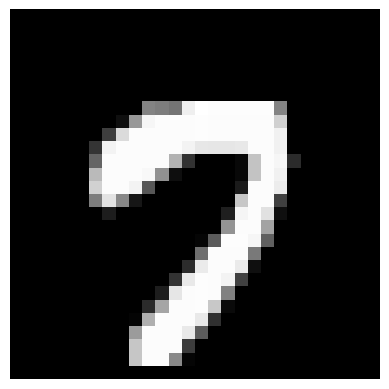

In [16]:
import matplotlib.pyplot as plt

index = 10
print("Predict = " + str(model.predict(x_test)[index]))
plt.axis('off')
plt.imshow(x_test.iloc[index].values.reshape((28,28)), cmap='gray')

Predict = 0


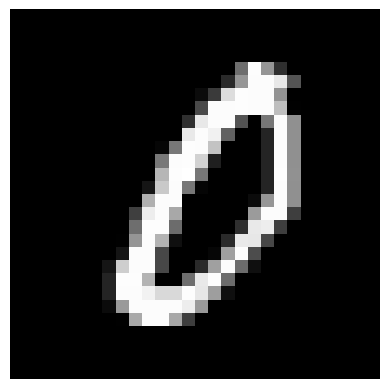

In [17]:
index = 50
print("Predict = " + str(model.predict(x_test)[index]))
plt.axis('off')
plt.imshow(x_test.iloc[index].values.reshape((28,28)), cmap='gray')